## **Exercise 1.1:** Tidying a dataset


In [27]:
import pandas as pd

# Read the dataset from the file
df = pd.read_csv('runtimes.csv', skiprows=4)


# Melt the dataset to bring it into tidy form
df = pd.DataFrame(df)

# Using pd.melt to tidy the DataFrame
tidy_df = pd.melt(df, id_vars=["algo", "size"], value_vars=["time1", "time2", "time3", "time4", "time5"], var_name="time", value_name="duration")

tidy_df = tidy_df.dropna(subset=['duration'])

tidy_df['size'] = tidy_df['size'].astype(int)
tidy_df['duration'] = tidy_df['duration'].astype(float)
tidy_df['algo'] = tidy_df['algo'].astype(str)
tidy_df['time'] = tidy_df['time'].astype(str)

print(tidy_df.head())
print(tidy_df.dtypes)


          algo     size   time     duration
0  distributed     4096  time1     3.736606
1  distributed    16384  time1    14.792794
2  distributed    65536  time1    59.123347
3  distributed   262144  time1   240.747448
4  distributed  1048576  time1  1097.788352
algo         object
size          int64
time         object
duration    float64
dtype: object


## **Exercise 1.2:** Basic Transformations and Visualizations


In [31]:
mpg_dataset = pd.read_csv('mpg-data.csv')

In [36]:
unique_classes = mpg_dataset["class"].unique()
dataframe_dict = {}
for carr_class in unique_classes:
    dataframe_dict[carr_class] = mpg_dataset[mpg_dataset["class"] == carr_class]

In [44]:
data_chunk = dataframe_dict['midsize']

In [46]:

from sklearn.linear_model import LinearRegression

linear_models_dict = {}
for carr_class in unique_classes:
    lr = LinearRegression()
    data_chunk = dataframe_dict[carr_class]
    linear_models_dict[carr_class] = lr.fit(data_chunk[['hwy']], data_chunk[['displ']])

In [47]:
linear_models_dict

{'compact': LinearRegression(),
 'midsize': LinearRegression(),
 'suv': LinearRegression(),
 '2seater': LinearRegression(),
 'minivan': LinearRegression(),
 'pickup': LinearRegression(),
 'subcompact': LinearRegression()}

In [53]:
colors = {'Compact': 'blue', 'SUV': 'green', 'Truck': 'red'}
# Create dictionary assigning each class a unique color
colors = {car_class: color for car_class, color in zip(unique_classes, ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan'])}






{'compact': 'blue',
 'midsize': 'green',
 'suv': 'red',
 '2seater': 'purple',
 'minivan': 'orange',
 'pickup': 'brown',
 'subcompact': 'pink'}

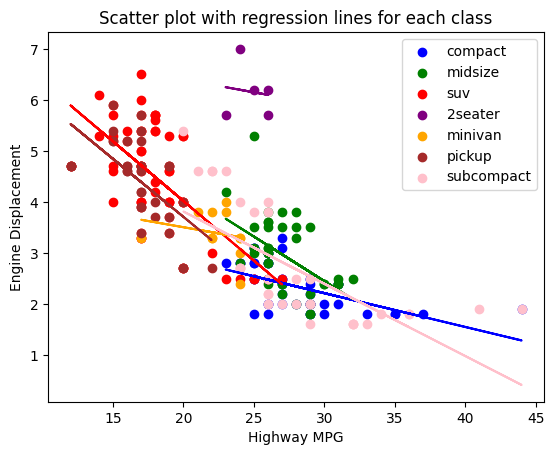

In [54]:
import matplotlib.pyplot as plt

# Iterate over each class in linear_models_dict
for carr_class, model in linear_models_dict.items():
    # Get the data chunk for the current class
    data_chunk = dataframe_dict[carr_class]
    
    # Get the x and y values for the scatter plot
    x = data_chunk['hwy']
    y = data_chunk['displ']
    
    # Plot the data points and regression line with the same color
    color = colors[carr_class]
    plt.scatter(x, y, label=carr_class, color=color)
    plt.plot(x, model.predict(data_chunk[['hwy']]), color=color)
    
# Set the labels and title for the plot
plt.xlabel('Highway MPG')
plt.ylabel('Engine Displacement')
plt.title('Scatter plot with regression lines for each class')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


In [55]:
median_hwy = mpg_dataset.groupby(['class', 'year'])['hwy'].median().reset_index()
print(median_hwy)


         class  year   hwy
0      2seater  1999  24.5
1      2seater  2008  25.0
2      compact  1999  26.0
3      compact  2008  29.0
4      midsize  1999  26.0
5      midsize  2008  28.0
6      minivan  1999  22.0
7      minivan  2008  23.0
8       pickup  1999  17.0
9       pickup  2008  17.0
10  subcompact  1999  26.0
11  subcompact  2008  26.5
12         suv  1999  17.0
13         suv  2008  18.0


## **Exercise 1.3:** Hue rotation

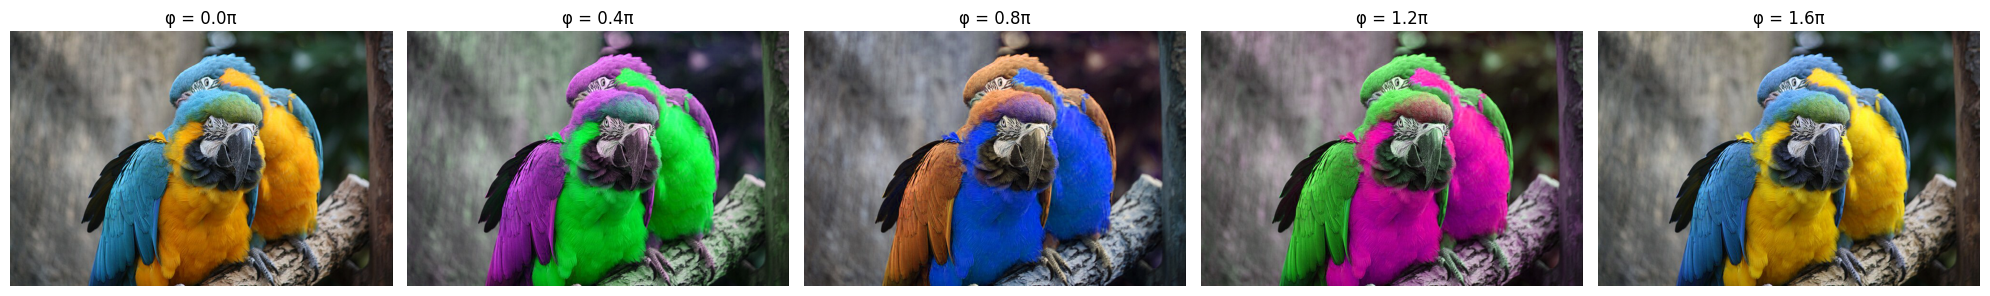

In [58]:
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb, rgb_to_hsv

img_path = 'BlueAndYellowMacaw_AraArarauna.jpg'
img_parrots = Image.open(img_path)

# convert image to HSV, rotate hue, and convert back to RGB
def rotate_hue(image, angle):
    hsv_image = rgb_to_hsv(np.array(image)/255.0)
    hsv_image[:, :, 0] = (hsv_image[:, :, 0] + angle) % 1.0
    rgb_image = hsv_to_rgb(hsv_image)
    rgb_image = np.clip(rgb_image, 0, 1)
    return Image.fromarray((rgb_image * 255).astype(np.uint8))

angles = [(k * 2 * np.pi) / 5 for k in range(5)]

rotated_images = [rotate_hue(img_parrots, angle) for angle in angles]

fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for ax, img, angle in zip(axes, rotated_images, angles):
    ax.imshow(img)
    ax.set_title(f'φ = {angle / np.pi:.1f}π')
    ax.axis('off')
plt.tight_layout()
plt.show()


## **Exercise 1.4:** visualizing the exp onential function